In [29]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [30]:
#%openad clear sessions
%openad add toolkit ds4sd
%openad add toolkit rxn
%openad list toolkits
%openad set llm bam
import warnings
warnings.filterwarnings('ignore')

<span style="color: #d00">Action aborted</span> <br> 
<span style="color: #ccc">Run `clear sessions` and try again</span> <br> 


<span style="color: #d00">Action aborted</span> <br> 
<span style="color: #ccc">Run `clear sessions` and try again</span> <br> 


<span style="color: #ccc">These are the toolkits you currently have installed <br> 
To see all available toolkits, run `list all toolkits`</span> <br> 


Toolkit,Description
RXN,Computational Chemistry
DS4SD,Deep Search: Connecting & ingesting unstructured data


<span style="color: #090"> The Following has been set as the current llm service BAM</span> <br> 


## Prerequisities

You must have Jupyterlab-rise installed and enabled

Use the slide show icon at top of notebook to run

Run the cells above before running

![](./media/AD_Banner.jpg)
<a id="top">

# Demonstration : Source PFAS Molecules and find Alternatives

### - Use IBM Deep Search to search for PFAS molecules
### - Use IBM's OpenAD's open-source property generation to generate additional properties
### - Merge and collate molecule data with OpenAD toolkit
### - Generate similar molecules with IBM open-source Regression Transformer 
### - With Deep Search determine if generated molecules are mentioned in a patent
### - Take one of the molecules and Use IBM RXN Retrosynthesis commands to generate a path to synthesis


### <span style="background: blue; color: white">Step 1 Use IBM Deep Search to search for PFAS molecules </span>

In [40]:
%openad set context ds4sd
%openad search collection 'PubChem' for 'PFOA OR PFOS OR PFHxS OR PFNA OR HFPO-DA'


Estimated results: 6 <br> 


  0%|          | 0/1 [00:00<?, ?it/s]

<span style="color: #ccc">Next up, you can run: </span>`result open`/`edit`/`copy`/`display`/`as dataframe`/`save [as '<filename.csv>']` <br> 


DS_URL,cid,cas_number,ec_number,SMILES,chemical_name,molecular weight,xlogp3,hydrogen bond donor count,hydrogen bond acceptor count,rotatable bond count,exact mass,monoisotopic mass,topological polar surface area,heavy atom count,formal charge,complexity,isotope atom count,defined atom stereocenter count,undefined atom stereocenter count,covalently-bonded unit count,compound is canonicalized
"<a href=""https://sds.app.accelerate.science//projects/1234567890abcdefghijklmnopqrstvwyz123456/library/public?search=JTdCJTIyY29sbGVjdGlvbnMlMjIlM0ElNUIlMjJwdWJjaGVtJTIyJTVEJTJDJTIydHlwZSUyMiUzQSUyMkRvY3VtZW50JTIyJTJDJTIyZXhwcmVzc2lvbiUyMiUzQSUyMmZpbGUtaW5mby5kb2N1bWVudC1oYXNoJTNBJTIwJTVDJTIyMGY3OTMwOTU2NjVlNjYzMWEyMDc0OGI0N2FjYWVmNmZiOGEyMjc2MzFlZDhhYTdlMTE4MzhmMGIxMzU5MGY4NCU1QyUyMiUyMiUyQyUyMmZpbHRlcnMlMjIlM0ElNUIlNUQlMkMlMjJzZWxlY3QlMjIlM0ElNUIlMjJfbmFtZSUyMiUyQyUyMmRlc2NyaXB0aW9uLmNvbGxlY3Rpb24lMjIlMkMlMjJwcm92JTIyJTJDJTIyZGVzY3JpcHRpb24udGl0bGUlMjIlMkMlMjJkZXNjcmlwdGlvbi5wdWJsaWNhdGlvbl9kYXRlJTIyJTJDJTIyZGVzY3JpcHRpb24udXJsX3JlZnMlMjIlNUQlMkMlMjJpdGVtSW5kZXglMjIlM0EwJTJDJTIycGFnZVNpemUlMjIlM0ExMCUyQyUyMnNlYXJjaEFmdGVySGlzdG9yeSUyMiUzQSU1QiU1RCUyQyUyMnZpZXdUeXBlJTIyJTNBJTIyc25pcHBldHMlMjIlMkMlMjJyZWNvcmRTZWxlY3Rpb24lMjIlM0ElN0IlMjJyZWNvcmQlMjIlM0ElN0IlMjJpZCUyMiUzQSUyMjBmNzkzMDk1NjY1ZTY2MzFhMjA3NDhiNDdhY2FlZjZmYjhhMjI3NjMxZWQ4YWE3ZTExODM4ZjBiMTM1OTBmODQlMjIlN0QlN0QlN0Q%3D"" target=""_blank""> Deep Search Web Link",114481,26099-32-1,236-236-8,C(=O)(C(C(F)(F)F)(OC(C(C(F)(F)F)(F)F)(F)F)F)O,"2,3,3,3-tetrafluoro-2-(heptafluoropropoxy)propanoic acid",330.050000,3.600000,1.000000,14.000000,4.000000,329.975004,329.975004,46.500000,20.000000,0.000000,383.000000,0.000000,0.000000,1.000000,1.000000,Yes
"<a href=""https://sds.app.accelerate.science//projects/1234567890abcdefghijklmnopqrstvwyz123456/library/public?search=JTdCJTIyY29sbGVjdGlvbnMlMjIlM0ElNUIlMjJwdWJjaGVtJTIyJTVEJTJDJTIydHlwZSUyMiUzQSUyMkRvY3VtZW50JTIyJTJDJTIyZXhwcmVzc2lvbiUyMiUzQSUyMmZpbGUtaW5mby5kb2N1bWVudC1oYXNoJTNBJTIwJTVDJTIyOWMzMThkMzliNzBhMmM1N2E5ZjAwZDA0ZWFjMGUzZWIyMDIxNzQxZDczYjJkNjlkNDVhN2U5N2Q4OWNiNWYzOCU1QyUyMiUyMiUyQyUyMmZpbHRlcnMlMjIlM0ElNUIlNUQlMkMlMjJzZWxlY3QlMjIlM0ElNUIlMjJfbmFtZSUyMiUyQyUyMmRlc2NyaXB0aW9uLmNvbGxlY3Rpb24lMjIlMkMlMjJwcm92JTIyJTJDJTIyZGVzY3JpcHRpb24udGl0bGUlMjIlMkMlMjJkZXNjcmlwdGlvbi5wdWJsaWNhdGlvbl9kYXRlJTIyJTJDJTIyZGVzY3JpcHRpb24udXJsX3JlZnMlMjIlNUQlMkMlMjJpdGVtSW5kZXglMjIlM0EwJTJDJTIycGFnZVNpemUlMjIlM0ExMCUyQyUyMnNlYXJjaEFmdGVySGlzdG9yeSUyMiUzQSU1QiU1RCUyQyUyMnZpZXdUeXBlJTIyJTNBJTIyc25pcHBldHMlMjIlMkMlMjJyZWNvcmRTZWxlY3Rpb24lMjIlM0ElN0IlMjJyZWNvcmQlMjIlM0ElN0IlMjJpZCUyMiUzQSUyMjljMzE4ZDM5YjcwYTJjNTdhOWYwMGQwNGVhYzBlM2ViMjAyMTc0MWQ3M2IyZDY5ZDQ1YTdlOTdkODljYjVmMzglMjIlN0QlN0QlN0Q%3D"" target=""_blank""> Deep Search Web Link",67821,4149-60-4 (ammonium salt),206-801-3,C(=O)(C(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)O,Perfluorononanoic acid,464.080000,5.600000,1.000000,19.000000,7.000000,463.970508,463.970508,37.300000,28.000000,0.000000,615.000000,0.000000,0.000000,0.000000,1.000000,Yes
"<a href=""https://sds.app.accelerate.science//projects/1234567890abcdefghijklmnopqrstvwyz123456/library/public?search=JTdCJTIyY29sbGVjdGlvbnMlMjIlM0ElNUIlMjJwdWJjaGVtJTIyJTVEJTJDJTIydHlwZSUyMiUzQSUyMkRvY3VtZW50JTIyJTJDJTIyZXhwcmVzc2lvbiUyMiUzQSUyMmZpbGUtaW5mby5kb2N1bWVudC1oYXNoJTNBJTIwJTVDJTIyOWRlOGNjZjBhYzI2YWVjZTQ2MzM1NTZjZGQ3YWI3ZTc3YmY5ZWQ1MDVkZmNiNTBjNzQyMmU3YzQxZmMwMGQxOSU1QyUyMiUyMiUyQyUyMmZpbHRlcnMlMjIlM0ElNUIlNUQlMkMlMjJzZWxlY3QlMjIlM0ElNUIlMjJfbmFtZSUyMiUyQyUyMmRlc2NyaXB0aW9uLmNvbGxlY3Rpb24lMjIlMkMlMjJwcm92JTIyJTJDJTIyZGVzY3JpcHRpb24udGl0bGUlMjIlMkMlMjJkZXNjcmlwdGlvbi5wdWJsaWNhdGlvbl9kYXRlJTIyJTJDJTIyZGVzY3JpcHRpb24udXJsX3JlZnMlMjIlNUQlMkMlMjJpdGVtSW5kZXglMjIlM0EwJTJDJTIycGFnZVNpemUlMjIlM0ExMCUyQyUyMnNlYXJjaEFmdGVySGlzdG9yeSUyMiUzQSU1QiU1RCUyQyUyMnZpZXdUeXBlJTIyJTNBJTIyc25pcHBldHMlMjIlMkMlMjJyZWNvcmRTZWxlY3Rpb24lMjIlM0ElN0IlMjJyZWNvcmQlMjIlM0ElN0IlMjJpZCUyMiUzQSUyMjlkZThjY2YwYWMyNmFlY2U0NjMzNTU2Y2RkN2FiN2U3N2JmOWVkNTA1ZGZjYjUwYzc0MjJlN2M0MWZj

### <span style="background: blue; color: white"> Step 2: Use IBM's OpenAD open-source property generation to generate additional properties</span>

Load molecules into a OpenAD molecule set and Initialize the list of additional proerties to generate

In [41]:
# Load the data from the datframe Style object into the molecules data set
df_data = %openadd result as dataframe

%openad load molecules using dataframe df_data

#get list of Smiles molecules
a_list = list(set(df_data['SMILES'].to_list()))

#Define list of Delta to be inferred properties
properties = ['is_scaffold', 'bertz', 'tpsa', 'logp', 'qed', 'plogp', 'penalized_logp', 'lipinski', 'sas', 'esol']

<span style="color: #090">Records loaded from file : 6</span> <br> 


<span style="color: #090">Distinct molecules loaded to molecule set : 6</span> <br> 


Generate and merge the additional properties

In [42]:
# Generate SMILES properties
properties = %openadd propd get molecule property {properties} for  {a_list} 
%openad merge molecules data using dataframe properties

Output()

<span style="color: #090">Molecule Data Merged</span> <br> 


<span style="background: blue; color: white">Let's Examine the available Molecules</span>

In [43]:
mol_list = %openadd export molecules
mol_view = %openad show molecules using dataframe mol_list as molsobject
mol_view.display()

MolGridWidget(grid_id='show_molsgrid_df_mol_list')

Tip: To select what parameters to display: <br> 
`result.display(**{ 'subset':['NAME'], 'tooltip':['SMILES'] })` <br> 

For more options, see: https://mols2grid.readthedocs.io/en/latest/notebooks/customization.html <br> 


Select several molecules before running the next cell.

In [44]:
mol_view.get_selection()

,NAME,SMILES,canonical_smiles,isomeric_smiles,inchi,inchikey,formula,atom_stereo_count,bond_stereo_count,charge,...,qed,sas,number_of_aromatic_rings,number_of_atoms,number_of_h_acceptors,number_of_heterocycles,number_of_large_rings,number_of_rings,number_of_rotatable_bonds,number_of_stereocenters
2,Perfluorooctanoic acid,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,"InChI=1S/C8HF15O2/c9-2(10,1(24)25)3(11,12)4(13,14)5(15,16)6(17,18)7(19,20)8(21,22)23/h(H,24,25)",SNGREZUHAYWORS-UHFFFAOYSA-N,C8HF15O2,None,None,0.0,...,0.653063,2.672236,None,None,None,None,None,None,None,None
3,Perfluorooctane sulfonic acid,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,"InChI=1S/C8HF17O3S/c9-1(10,3(13,14)5(17,18)7(21,22)23)2(11,12)4(15,16)6(19,20)8(24,25)29(26,27)28/h(H,26,27,28)",YFSUTJLHUFNCNZ-UHFFFAOYSA-N,C8HF17O3S,None,None,0.0,...,0.402494,2.760370,None,None,None,None,None,None,None,None


<span style="background: blue; color: white"> Drilling in on the details of a molecule </span>

In [45]:
%openad display molecule 'Perfluorononanoic acid'

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### <span style="background: blue; color: white"> Step 3: Generate Similar Molecules with IBM's open-source Regression Transformer </span>

In [46]:
datasets = []
for row in mol_list.to_dict("records"):
    MY_SMILES= row['canonical_smiles']
    esol= float(row['esol'])
    MY_PARAMS = { "fraction_to_mask": 0.1 , "property_goal": { "<esol>": esol} }
    display("Generating Molecules for "+MY_SMILES+" with soluability:"+str(row['esol']) )
    result = %openadd gend generate with RegressionTransformerMolecules data for $MY_SMILES sample 10 \
    using(algorithm_version=solubility  search=sample temperature=1.5 tolerance=60.0 sampling_wrapper = "$MY_PARAMS" )
    display(result)
    datasets.append(result)

'Generating Molecules for O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(F)F)C(F)(F)F with soluability:-4.211602675454153'

Output()

,0,1
0,O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(F)F)C(F)(F)O,<esol>-5.4681
1,O=C(O)C(F)(CC(F)(F)C(F)(F)C(F)(F)F)C(F)(F)F,<esol>-5.4681
2,O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(Cl)F)C(F)(F)F,<esol>-5.4681
3,O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(F)F)C(Cl)(F)F,<esol>-5.4681
4,OC(O)C(F)(OC(F)(F)C(F)(F)C(F)(F)F)C(F)(F)F,<esol>-5.4681
5,O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(F)O)C(F)(F)F,<esol>-5.4681
6,O=C(O)C(F)(OC(F)(F)P(F)(F)C(F)(F)F)C(F)(F)F,<esol>-5.4819
7,O=C(O)P(F)(OC(F)(F)C(F)(F)C(F)(F)F)C(F)(F)F,<esol>-5.4819
8,O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(F))F,<esol>-5.4681
9,O=C(O)C(F)(OC(F)(F)C(F)(O)C(F)(Cl)F)C(F)(F)F,<esol>-5.4681


'Generating Molecules for O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F with soluability:-6.5519409880260815'

Output()

,0,1
0,C=C(Cl)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
1,C(Cl)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
2,O=C(Cl)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
3,C(Cl)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)CF,<esol>-6.852
4,C=C(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
5,C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(Cl)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
6,O=C(O)C(F)(F)C(F)(Cl)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
7,O=C(C)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
8,O=C(N)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
9,O=C(N)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935


'Generating Molecules for O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F with soluability:-5.7534665357831125'

Output()

,0,1
0,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)Cl,<esol>-6.852
1,O=C(O)C(Cl)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
2,O=C(O)C(F)(F)C(F)(F)P(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
3,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)CF,<esol>-6.852
4,C=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
5,C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
6,C=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
7,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(Cl)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
8,ClC(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
9,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(O)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681


'Generating Molecules for O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F with soluability:-6.612922026752669'

Output()

,0,1
0,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)Cl,<esol>-6.8935
1,O=S(=O)(O)C(F)(F)P(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
2,O=S(=O)(O)C(F)(F)C(F)(F)C(Cl)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
3,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(C)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
4,O=S(=O)(O)C(F)(F)C(F)(F)C(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
5,O=S(=O)(O)C(F)(F)C(Cl)(F)C(F)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
6,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(Cl)C(F)(F)C(F)(F)F,<esol>-6.8935
7,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
8,O=S(=O)(O)C(F)(F)C(F)(F)C(C)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
9,O=S(=O)(O)C(F)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935


'Generating Molecules for O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F with soluability:-5.0159731222667325'

Output()

,0,1
0,O=S(O)(O)S(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
1,O=S(S)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
2,O=S(O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
3,O=S(F)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
4,O=S(C)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
5,O=S(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
6,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(O)C(F)(F)C(F)(F)F,<esol>-5.4681
7,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(N)C(F)(F)C(F)(F)F,<esol>-5.4681
8,O=S(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
9,C=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681


'Generating Molecules for O=S(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F with soluability:-4.755208830342681'

Output()

,0,1
0,O=S(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(Cl)(F)C(F)(F)C(F)(F)F,<esol>-5.5096
1,O=S(=O)([O-])C(F)(F)C(O)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
2,O=S(=O)([O-])C(F)(F)C(Cl)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.5096
3,OC(=O)COC(F)(F)C(O)(F)C(N)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
4,OS(=O)(N)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
5,OC(=O)COC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
6,OS(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
7,OC(=O)C(F)(F)C(F)(F)C(O)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
8,OC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.5096
9,O=S(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)Cl,<esol>-5.5096


### <span style="background: blue; color: white">Step 4: With IBM Deep Search determine if generated molecules are mentioned in a patent</span>

In [47]:
x = 0
patent_count=0
patents_to_search=[]
patented_molecules=[]
searched_list=[]

# For all the molecules in the data set search for those with patents
for result in datasets:  
    for mol in result['0'].to_list():
        # remove duplicates
        if mol in searched_list:
            continue
        else:
            searched_list.append(mol)
        # Execute Patent Search    
        x = %openadd search for patents containing molecule '{mol}'
        
        # If has patents append to list
        if isinstance(x,DataFrame):
            patents_to_search.extend(x["PATENT ID"].to_list())
            patented_molecules.append(mol)
            print(f'patents for molecule {mol}:\n  {x["PATENT ID"].to_list()}')


patents for molecule O=C(C)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F:
  ['US9705097', 'US20140306203', 'US20140374727A1']
patents for molecule C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F:
  ['US7196121', 'US20040082685A1']
patents for molecule OC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F:
  ['US7541430', 'US7897560', 'JP2007524584T', 'JP2018538335T', 'US20070105750A1', 'US20070244054A1', 'US20090088388', 'US20100184641A1', 'US20190000923A1', 'US20220098252', 'US20220249614A1']


### <span style="background: blue; color: white">Step 5: Add the Patented molecules to our list and generate properties for them </span>

In [48]:
#generate the new properties for all of the new molecules
properties_all = ['molecular_weight', 'number_of_aromatic_rings', 'number_of_h_acceptors', 'number_of_atoms','number_of_rings', 'number_of_rotatable_bonds', 'number_of_large_rings', 'number_of_heterocycles', 'number_of_stereocenters','is_scaffold', 'bertz', 'tpsa', 'logp', 'qed', 'plogp', 'penalized_logp', 'lipinski', 'sas', 'esol']
new_props = %openadd propd get molecule property {properties_all} for {patented_molecules} 

# For easch molecule with a patent add it to our molecule set
for x in patented_molecules:
    %openad add molecule {x} Force

%openad merge molecules data using dataframe new_props

Output()

<span style="color: #090">Molecule 3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,10-heptadecafluorodecan-2-one   CC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F was added</span> <br> 


<span style="color: #090">Molecule 2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-pentadecafluorooctan-1-ol   OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F was added</span> <br> 


<span style="color: #090">Molecule 4,4,5,5,6,6,7,7,8,8,9,9,9-tridecafluorononanoic acid   O=C(O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F was added</span> <br> 


<span style="color: #090">Molecule Data Merged</span> <br> 


### <span style="background: blue; color: white">Step 6: Lets Examine one of the Patented Molecules and Generate Retrosynthesis paths for it</span>

 Use the Interactive Help to find out how to create the molecule using the IBM RXN Predict Retrosynthesis capability 

In [49]:
%openad tell me about the command predict retrosynthesis providing syntax and list all available parameters

Output()

<span style="color: #090">Question:</span> <span style="color: #dc0"> Tell me about the command predict retrosynthesis providing syntax and list all available parameters</span> <br> 

The  `predict retrosynthesis`  command is used to perform a retrosynthesis route prediction on a molecule. It takes a single SMILES string as input and predicts the possible synthetic routes for that molecule. The command syntax for  `predict retrosynthesis`  is as follows: `predict retrosynthesis '<smiles>' [using (option1=<value> option2=<value>) ]` Here are the optional parameters that can be specified in the  `using`  clause: <br> 

-  `availability_pricing_threshold=<int>` : Maximum price in USD per g/ml of compounds. Default: no threshold. <br> 
-  `available_smiles=<smiles>.<smiles>.<smiles>` : List of molecules available as precursors, delimited with a period. <br> 
-  `exclude_smiles=<smiles>.<smiles>.<smiles>` : List of molecules to exclude from the set of precursors, delimited with a period. <br> 
-  `exclude_substructures=<smiles>.<smiles>.<smiles>` : List of substructures to exclude from the set of precursors, delimited with a period. <br> 
-  `exclude_target_molecule=<boolean>` : Exclude the target molecule from the set of precursors. The default is True. <br> 
-  `fap=<float>` : Every retrosynthetic step is evaluated with the FAP, and is only retained when forward confidence is greater than the FAP value. The default is 0.6. <br> 
-  `max_steps=<int>` : The maximum number of steps in the results. The default is 3. <br> 
-  `nbeams=<int>` : The maximum number of beams exploring the hypertree. The default is 10. <br> 
-  `pruning_steps=<int>` : The number of steps to prune a hypertree. The default is 2. <br> 
-  `ai_model=<model_name>` : What model to use. Use the command  `list rxn models`  to list all available models. The default is '2020-07-01'. <br> 

For example, to predict the retrosynthesis route for the molecule  `BrCCc1cccc2c(Br)c3ccccc3cc12` , you would use the following command: `predict retrosynthesis 'BrCCc1cccc2c(Br)c3ccccc3cc12' using (max_steps=3)`  <br> 


<span style="background: blue; color: white"> Run IBM RXN Retrosynthesis </span>

<span style="color: #090">You successfully logged in to <span style="color: #dc0">RXN</span></span> <br> 
<span style="color: #ccc">Your access token does not have an expiration date</span> <br> 


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<span style="color: #090">Target Molecule:</span> O=C(O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


Output()

Output()

###  <span style="color: #090">Showing path </span> 0 <span style="color: #090"> with confidence </span>0.988: <br> 


<span style="color: #090"> Reaction: </span>COC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + Cl --->> O=C(O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


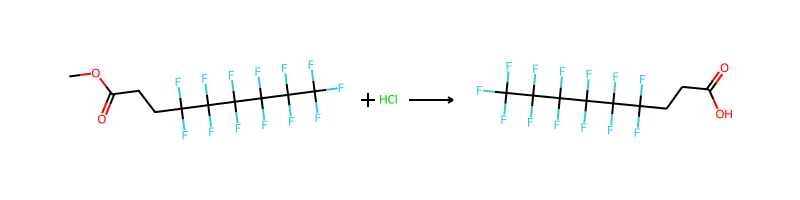

###  <span style="color: #090">Showing path </span> 1 <span style="color: #090"> with confidence </span>0.981: <br> 


<span style="color: #090"> Reaction: </span>CO + COC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + O + O[Na] --->> O=C(O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


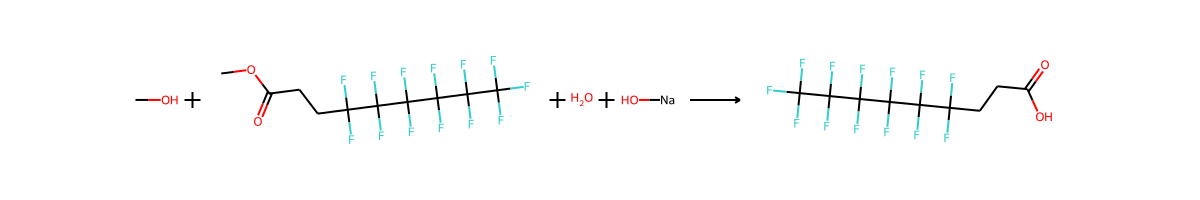

###  <span style="color: #090">Showing path </span> 2 <span style="color: #090"> with confidence </span>0.981: <br> 


<span style="color: #090"> Reaction: </span>CO + COC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + O[Na] --->> O=C(O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


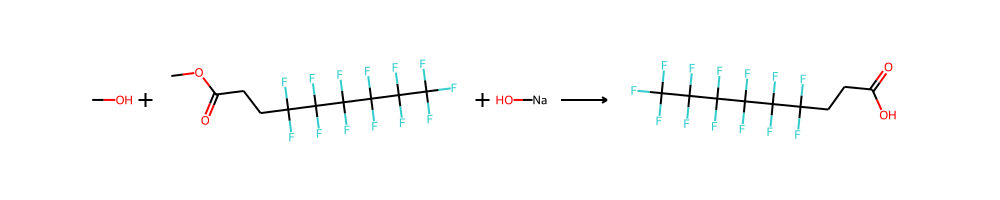

###  <span style="color: #090">Showing path </span> 3 <span style="color: #090"> with confidence </span>0.986: <br> 


<span style="color: #090"> Reaction: </span>CCOC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + Cl --->> O=C(O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


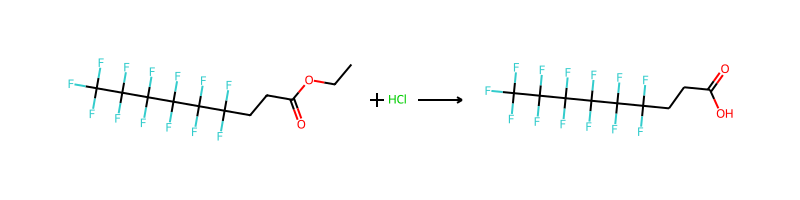

<span style="color: #090"> Reaction: </span>CCOC(=O)C=CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + CCOC(C)=O + [Pd] --->> CCOC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


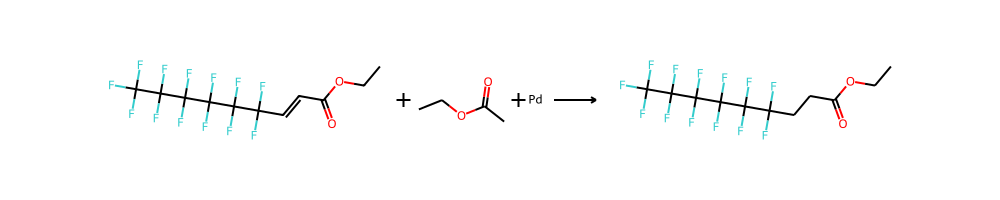

<span style="color: #090"> Reaction: </span>CCOC(=O)C=P(c1ccccc1)(c1ccccc1)c1ccccc1 + ClCCl + O=CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F --->> CCOC(=O)C=CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


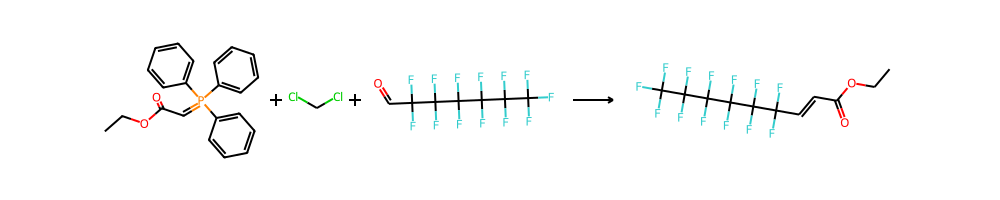

###  <span style="color: #090">Showing path </span> 4 <span style="color: #090"> with confidence </span>0.986: <br> 


<span style="color: #090"> Reaction: </span>CCOC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + Cl --->> O=C(O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


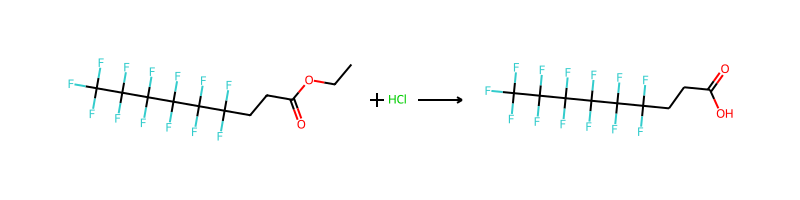

<span style="color: #090"> Reaction: </span>CCOC(=O)/C=C/C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + [H][H] + [Pd] --->> CCOC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


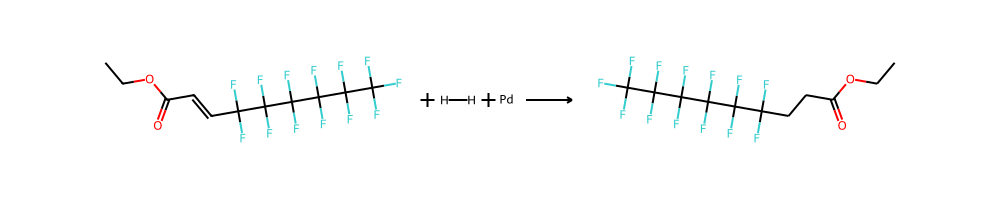

<span style="color: #090"> Reaction: </span>C1CCOC1 + CCOC(=O)CP(=O)(OCC)OCC + O=CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + [H-].[Na+] --->> CCOC(=O)/C=C/C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


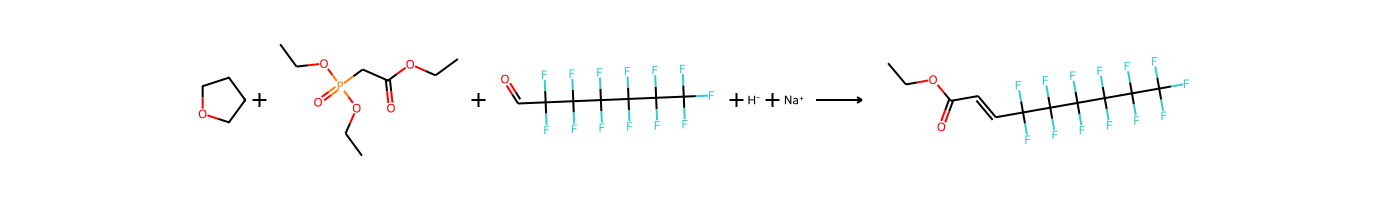

###  <span style="color: #090">Showing path </span> 5 <span style="color: #090"> with confidence </span>0.986: <br> 


<span style="color: #090"> Reaction: </span>CCOC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + Cl --->> O=C(O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


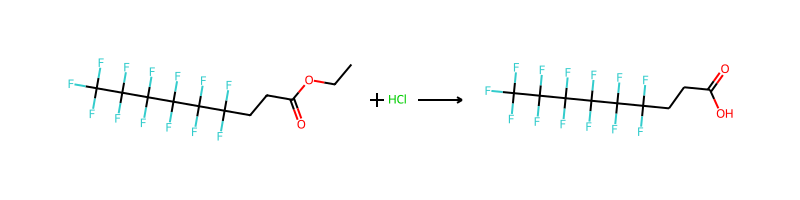

<span style="color: #090"> Reaction: </span>CCOC(=O)/C=C/C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + [H][H] + [Pd] --->> CCOC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


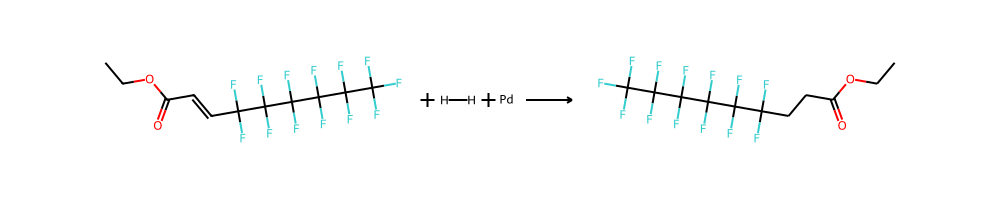

<span style="color: #090"> Reaction: </span>CCOC(=O)CP(=O)(OCC)OCC + O=CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + [H-].[Na+] --->> CCOC(=O)/C=C/C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


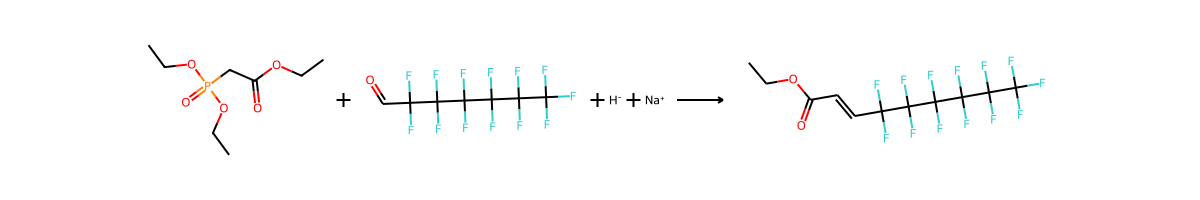

###  <span style="color: #090">Showing path </span> 6 <span style="color: #090"> with confidence </span>0.986: <br> 


<span style="color: #090"> Reaction: </span>CCOC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + Cl --->> O=C(O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


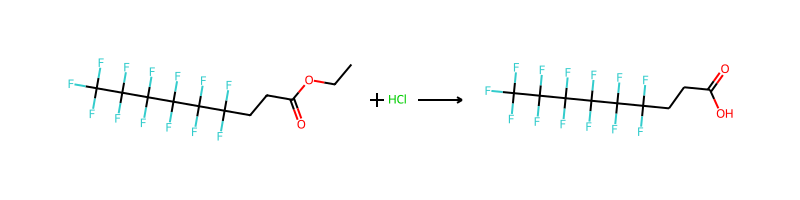

<span style="color: #090"> Reaction: </span>CCOC(=O)C=CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + CCOC(C)=O + [Pd] --->> CCOC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


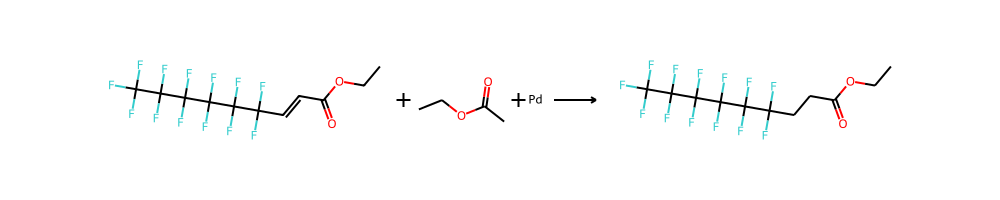

<span style="color: #090"> Reaction: </span>CCOC(=O)C=P(c1ccccc1)(c1ccccc1)c1ccccc1 + ClC(Cl)(Cl)Cl + O=CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F --->> CCOC(=O)C=CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


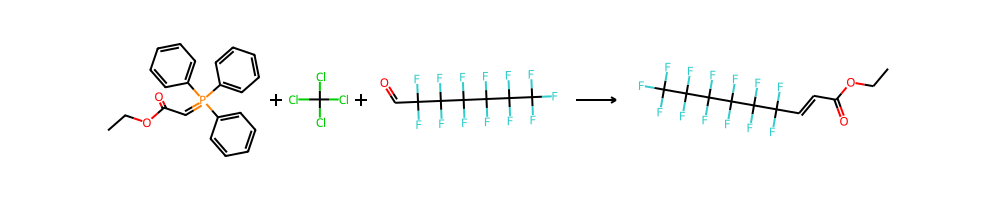

###  <span style="color: #090">Showing path </span> 7 <span style="color: #090"> with confidence </span>0.986: <br> 


<span style="color: #090"> Reaction: </span>CCOC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + Cl --->> O=C(O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


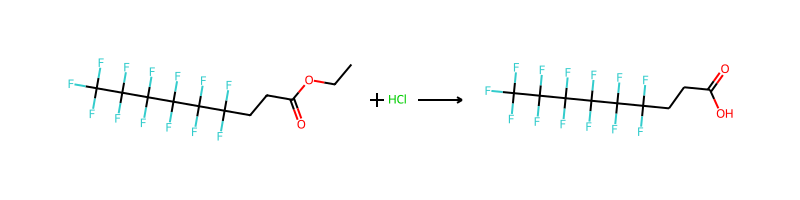

<span style="color: #090"> Reaction: </span>CCOC(=O)C=CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + CCOC(C)=O + [Pd] --->> CCOC(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


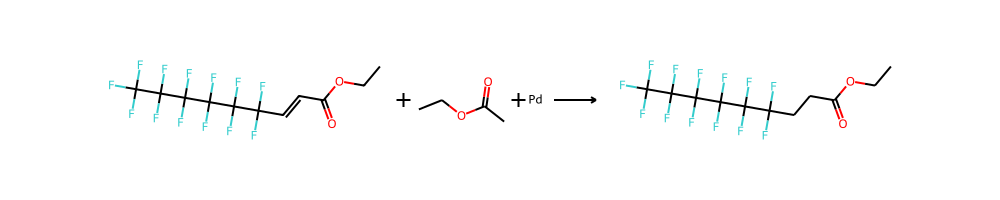

<span style="color: #090"> Reaction: </span>CCOC(=O)C=P(c1ccccc1)(c1ccccc1)c1ccccc1 + Cc1ccccc1 + O=CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F --->> CCOC(=O)C=CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


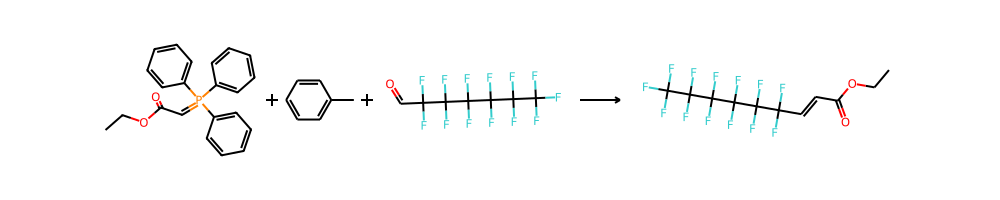

In [50]:
#set The RXN toolkit active
%openad set context rxn

#select the last molecule in the List
molecule = patented_molecules[-1]

%openad predict retrosynthesis  '{molecule}'
%openad enrich molecules with analysis

<span style="background: blue; color: white">Now lets take a look at what we know about the molecule</span>

In [51]:
%openad display molecule '{molecule}'

3Dmol.js failed to load for some reason. Please check your browser console for error messages.